In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# importing useful libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,BatchNormalization
import tensorflow as tf
import os
from PIL import Image
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

2024-10-27 21:12:34.858640: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-27 21:12:35.036758: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-27 21:12:35.210436: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730074355.392568  112220 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730074355.436537  112220 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-27 21:12:35.854663: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# creating a function to load the datasets

def load_images(path):
    images = []
    
    for filename in os.listdir(path):
        try:
            img = Image.open(os.path.join(path, filename))
            img = img.resize((128, 128))
            img = img.convert('RGB')
            img = np.array(img) / 255.0
            images.append(img)
        except OSError as e:
            print(f"Error loading {os.path.join(path, filename)}: {e}")
            continue
    return images

In [4]:
benign = load_images('benign')
malignant = load_images('malignant')

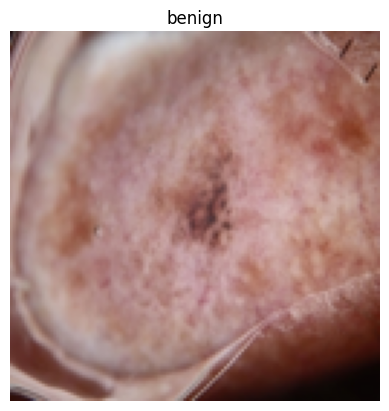

<Figure size 500x500 with 0 Axes>

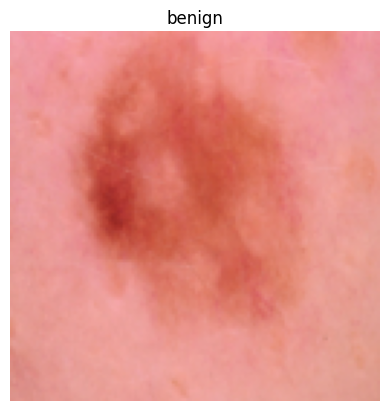

<Figure size 500x500 with 0 Axes>

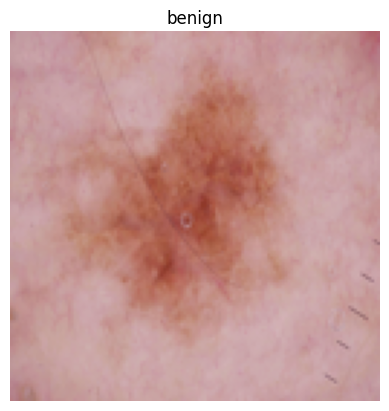

<Figure size 500x500 with 0 Axes>

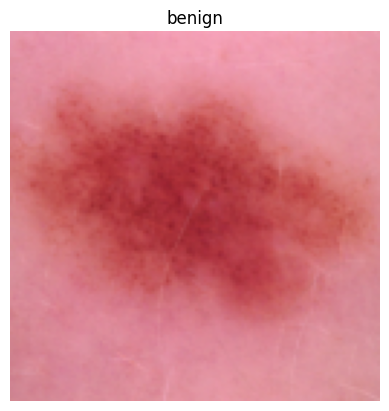

<Figure size 500x500 with 0 Axes>

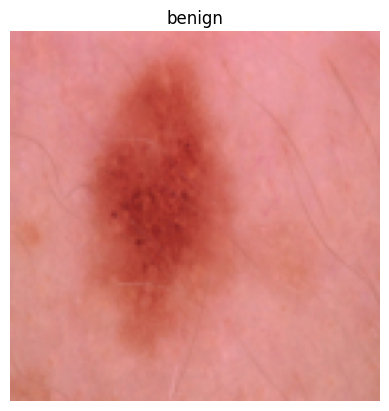

<Figure size 500x500 with 0 Axes>

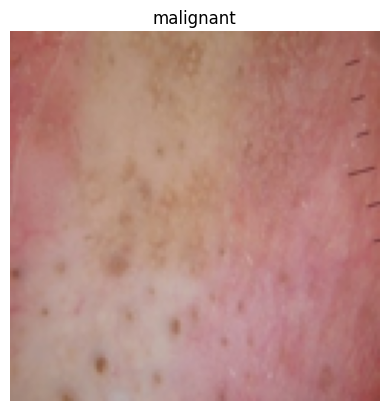

<Figure size 500x500 with 0 Axes>

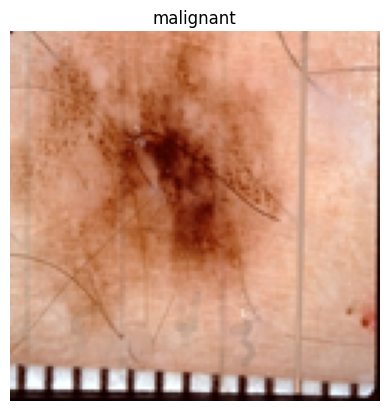

<Figure size 500x500 with 0 Axes>

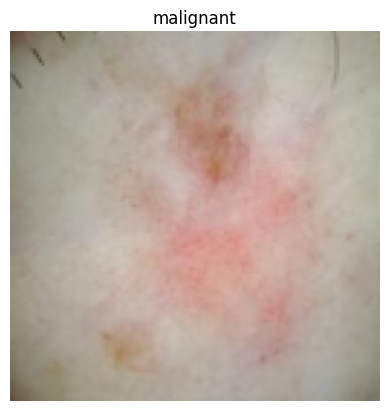

<Figure size 500x500 with 0 Axes>

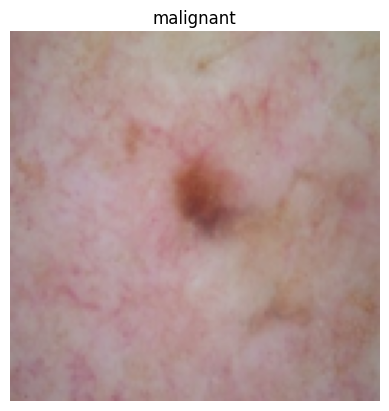

<Figure size 500x500 with 0 Axes>

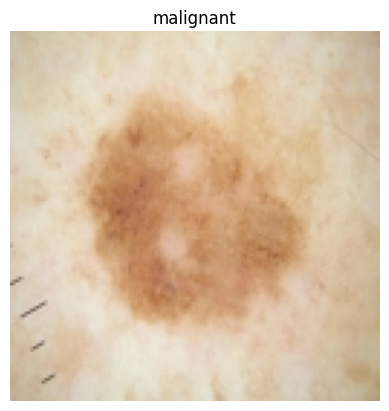

<Figure size 500x500 with 0 Axes>

In [5]:
for k,v in {'benign': benign[:5], 'malignant': malignant[:5]}.items():
    for i in v:
        plt.imshow(i)
        plt.title(label = k)
        plt.axis('off')
        plt.figure(figsize = (5,5))
        plt.tight_layout()
        plt.show()

In [6]:
np.shape(benign)

(30, 128, 128, 3)

In [7]:
# Creating the datasets
X = np.concatenate((benign, malignant))
y = np.concatenate((np.ones(len(benign)), np.zeros(len(malignant))))

In [8]:
print(f'% of benign: {(100*len(benign)/len(X)):.2f}/ % of malignant: {100*len(malignant)/len(X):.2f}')
print(f'n° of instances: {len(X)}')

% of benign: 11.11/ % of malignant: 88.89
n° of instances: 270


In [9]:
X_train, X_val, y_train, y_val = train_test_split(X,y,
                                                 train_size = 0.8,
                                                 shuffle =True,
                                                 random_state = 10)

In [10]:
y_train[:5]

array([0., 0., 0., 0., 0.])

In [11]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size = 7)

In [12]:
# creating a basic cvnn model

tf.random.set_seed(1)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 64, kernel_size=7, activation = 'relu', padding = "same", input_shape = [128,128,3]),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=3, activation = 'relu', padding = "same"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=3, activation = 'relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(filters = 256, kernel_size=3, activation = 'relu', padding = "same"),
    tf.keras.layers.Conv2D(filters = 256, kernel_size=3, activation = 'relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')])

/home/luantsp/Documentos/Projetos/CNN_project_UNICAMP/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-27 21:15:01.140867: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,513,217 (36.29 MB)

 Trainable params: 9,513,217 (36.29 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.layers

[<Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <Conv2D name=conv2d_5, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_2, built=True>]

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10


2024-10-27 21:15:29.938830: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134217728 exceeds 10% of free system memory.
2024-10-27 21:15:30.075915: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-10-27 21:15:30.158025: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-10-27 21:15:31.179585: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-10-27 21:15:31.231431: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7385 - loss: 0.6077 - val_accuracy: 0.8889 - val_loss: 0.3647
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8551 - loss: 0.4464 - val_accuracy: 0.8889 - val_loss: 0.3493
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8716 - loss: 0.5088 - val_accuracy: 0.8889 - val_loss: 0.3520
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8716 - loss: 0.4082 - val_accuracy: 0.8889 - val_loss: 0.3353
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8716 - loss: 0.4602 - val_accuracy: 0.8889 - val_loss: 0.3311
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8716 - loss: 0.4539 - val_accuracy: 0.8889 - val_loss: 0.3461
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8716 - loss: 0.4085 - val_accuracy: 0.8889 - val_loss: 0.2807
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8716 - loss: 0.3183 - val_accuracy: 0.8889 - val_loss: 0.6333
Epoch 9/10
7/7 ━━━━

In [17]:
model.evaluate(X_val,y_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 396ms/step - accuracy: 0.8947 - loss: 0.4054


[0.40877339243888855, 0.8888888955116272]

**O resultado foi apenas um pouco melhor do que um classificador nulo.**